In [1]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import astropy

plt.style.use('~/vedant.mplstyle')

In [2]:
h3 = Table.read('/n/holystore01/LABS/conroy_lab/Lab/h3/catalogs/rcat_V4.0.5.latest_MSG.h5')

In [3]:
for key in list(h3.columns):
    h3.rename_column(key, 'h3_' + key)

In [4]:
h3['GAIAEDR3_ID'] = h3['h3_GAIAEDR3_ID']

In [5]:
mage = Table.read('/n/holyscratch01/conroy_lab/vchandra/mage/catalogs/h3cal_rcat_V0.0_MSG.fits')

In [6]:
table = astropy.table.join(mage, h3, keys = 'GAIAEDR3_ID', join_type = 'left')

In [7]:
table['h3_Dist'] = table['h3_dist_adpt']
table['h3_Dist_err'] = table['h3_dist_adpt_err']

In [8]:
clean = (

    (table['h3_FLAG'] == 0)&
    (table['Vrot'] < 20)

)

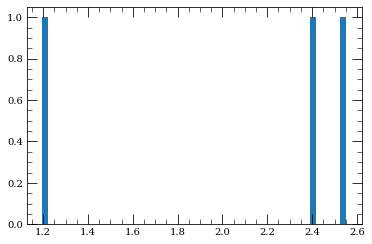

In [9]:
plt.hist(table[clean]['Vrot'], bins = 50);

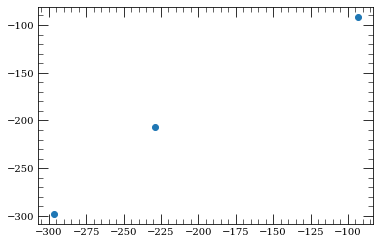

In [11]:
plt.scatter(table['h3_Vrad'][clean], table['Vrad'][clean])

In [12]:
ekw = dict(linestyle = 'none', marker = 'o', color = 'k', ecolor = 'gray', capsize = 0)
fs = 22

In [13]:
def comp(x):
    mins = np.nanmin([np.nanmin(table['h3_' + x][clean]), 
                                 np.nanmin(table[x][clean])])
    maxs = np.nanmax([np.nanmax(table['h3_' + x][clean]), 
                                 np.nanmax(table[x][clean])])
    lims = [mins - 0.1 * np.abs(mins), maxs + 0.1 * np.abs(maxs)]
    
    diff =  table[x][clean] - table['h3_' + x][clean]
    
    mad = np.median(np.abs(diff))
    bias = np.median(diff)

    plt.errorbar(table['h3_' + x][clean], table[x][clean],
                xerr = table['h3_' + x + '_err'][clean], yerr = table[x + '_err'][clean], **ekw)

    plt.plot(lims, lims, 'C3')
    plt.title('MAD: %.2f, Bias: %.2f' % (mad, bias), fontsize = fs)
    
    plt.xlim(lims)
    plt.ylim(lims)
    
    #if x == 'Dist':
    #    plt.xscale('log')
    #    plt.yscale('log')

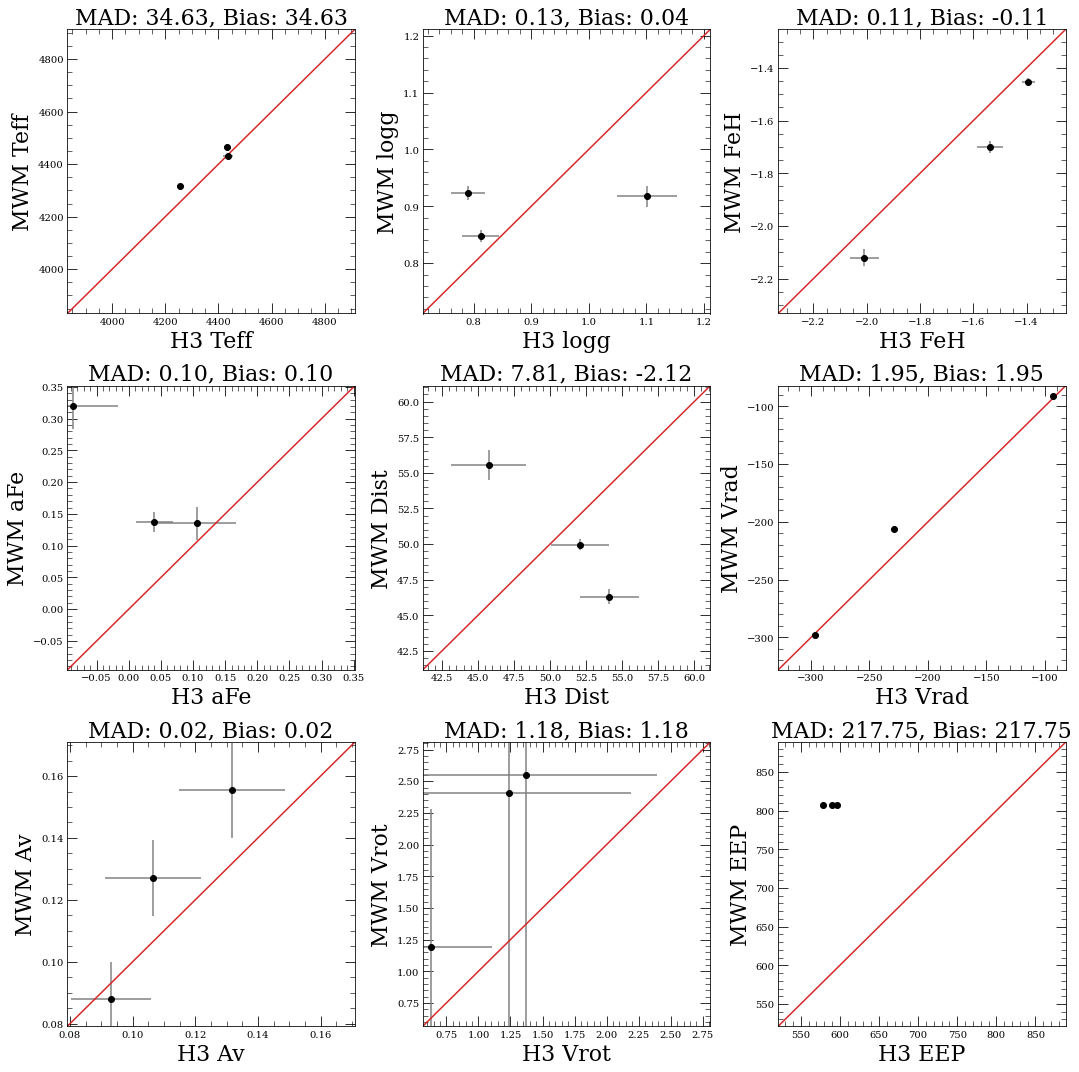

In [14]:
f,axs = plt.subplots(3,3,figsize = (15, 15))
axr = axs.ravel()

labels = ['Teff', 'logg', 'FeH', 'aFe', 'Dist', 'Vrad', 'Av', 'Vrot', 'EEP']

for ii in range(len(labels)):
    plt.sca(axr[ii])
    comp(labels[ii])
    
    plt.xlabel('H3 ' + labels[ii], fontsize = fs)
    plt.ylabel('MWM ' + labels[ii], fontsize = fs)
    
plt.tight_layout()

In [15]:
table[clean][np.abs((table['Vrad'][clean] - table['h3_Vrad'][clean])) > 5]

name,date,specfile,mage_ra,mage_dec,mage_target,mage_decker,mage_binning,mage_mjd,mage_airmass,mage_exptime,tdb_source_id,tdb_ra,tdb_dec,tdb_selection,H3_ID,PS_ID,TMASS_ID,WISE_ID,UNWISE_ID,GAIAEDR3_ID,GAIADR1_ID,TILE_ID,RA,DEC,RA_S,DEC_S,L,B,EBV,BHB,MGIANT,RAND,GUIDE,XFIT_RANK,PS_G,PS_R,PS_I,PS_Z,PS_Y,SDSS_U,SDSS_G,SDSS_R,SDSS_I,SDSS_Z,TMASS_J,TMASS_H,TMASS_K,WISE_W1,WISE_W2,UNWISE_W1,UNWISE_W2,GAIAEDR3_G,GAIAEDR3_BP,GAIAEDR3_RP,PS_G_ERR,PS_R_ERR,PS_I_ERR,PS_Z_ERR,PS_Y_ERR,SDSS_U_ERR,SDSS_G_ERR,SDSS_R_ERR,SDSS_I_ERR,SDSS_Z_ERR,TMASS_J_ERR,TMASS_H_ERR,TMASS_K_ERR,WISE_W1_ERR,WISE_W2_ERR,UNWISE_W1_ERR,UNWISE_W2_ERR,GAIAEDR3_G_ERR,GAIAEDR3_BP_ERR,GAIAEDR3_RP_ERR,GAIAEDR3_RA,GAIAEDR3_DEC,GAIAEDR3_RA_ERROR,GAIAEDR3_DEC_ERROR,GAIAEDR3_PARALLAX,GAIAEDR3_PARALLAX_ERROR,GAIAEDR3_PARALLAX_OVER_ERROR,GAIAEDR3_PMRA,GAIAEDR3_PMDEC,GAIAEDR3_PMRA_ERROR,GAIAEDR3_PMDEC_ERROR,GAIAEDR3_PSEUDOCOLOUR,GAIAEDR3_PSEUDOCOLOUR_ERROR,GAIAEDR3_NU_EFF_USED_IN_ASTROMETRY,GAIAEDR3_ASTROMETRIC_PARAMS_SOLVED,GAIAEDR3_PHOT_BP_RP_EXCESS_FACTOR,GAIAEDR3_VISIBILITY_PERIODS_USED,GAIAEDR3_RUWE,GAIAEDR3_IPD_GOF_HARMONIC_AMPLITUDE,GAIAEDR3_G_CORRECTED,GAIAEDR3_PARALLAX_CORRECTED,GAIAEDR3_PHOT_BP_RP_EXCESS_FACTOR_CORRECTED,GAIAEDR3_PARALLAX_PMRA_CORR,GAIAEDR3_PARALLAX_PMDEC_CORR,GAIAEDR3_PMRA_PMDEC_CORR,GAIAEDR3_RA_DEC_CORR,GAIAEDR3_RA_PARALLAX_CORR,GAIAEDR3_RA_PMRA_CORR,GAIAEDR3_RA_PMDEC_CORR,GAIAEDR3_DEC_PARALLAX_CORR,GAIAEDR3_DEC_PMRA_CORR,GAIAEDR3_DEC_PMDEC_CORR,WISE_CC_FLAGS,WISE_EXT_FLAG,ACAT_ID,EEP,EEP_lerr,EEP_uerr,EEP_err,init_FeH,init_FeH_lerr,init_FeH_uerr,init_FeH_err,init_aFe,init_aFe_lerr,init_aFe_uerr,init_aFe_err,init_Mass,init_Mass_lerr,init_Mass_uerr,init_Mass_err,pc_0,pc_0_lerr,pc_0_uerr,pc_0_err,pc_1,pc_1_lerr,pc_1_uerr,pc_1_err,pc_2,pc_2_lerr,pc_2_uerr,pc_2_err,pc_3,pc_3_lerr,pc_3_uerr,pc_3_err,Inst_R,Inst_R_lerr,Inst_R_uerr,Inst_R_err,Teff,Teff_lerr,Teff_uerr,Teff_err,logg,logg_lerr,logg_uerr,logg_err,logR,logR_lerr,logR_uerr,logR_err,FeH,FeH_lerr,FeH_uerr,FeH_err,aFe,aFe_lerr,aFe_uerr,aFe_err,Vrad,Vrad_lerr,Vrad_uerr,Vrad_err,Vrot,Vrot_lerr,Vrot_uerr,Vrot_err,Dist,Dist_lerr,Dist_uerr,Dist_err,Av,Av_lerr,Av_uerr,Av_err,logAge,logAge_lerr,logAge_uerr,logAge_err,Mass,Mass_lerr,Mass_uerr,Mass_err,logL,logL_lerr,logL_uerr,logL_err,Para,Para_lerr,Para_uerr,Para_err,Age,Age_lerr,Age_uerr,Age_err,lnZ,lnL,lnP,chisq_spec,nspecpix,chisq_phot,nbands,R_gal,R_gal_err,X_gal,X_gal_err,Y_gal,Y_gal_err,Z_gal,Z_gal_err,Vx_gal,Vx_gal_err,Vy_gal,Vy_gal_err,Vz_gal,Vz_gal_err,Vr_gal,Vr_gal_err,Vphi_gal,Vphi_gal_err,Vtheta_gal,Vtheta_gal_err,V_tan,V_tan_err,V_gsr,V_gsr_err,Lx,Lx_err,Ly,Ly_err,Lz,Lz_err,Ltot,Ltot_err,E_kin_pot1,E_kin_pot1_err,E_pot_pot1,E_pot_pot1_err,E_tot_pot1,E_tot_pot1_err,circLz_pot1,circLz_pot1_err,circLtot_pot1,circLtot_pot1_err,FLAG,dup,Sgr_l,Sgr_b,Sgr_FLAG,h3_starname,h3_tileID,h3_selID,h3_dateID,h3_fibID,h3_redID,h3_pipeID,h3_H3_ID,h3_TMASS_ID,h3_GAIADR1_ID,h3_GAIADR2_ID,h3_GAIAEDR3_ID,h3_UNWISE_ID,h3_RA,h3_DEC,h3_RA_S,h3_DEC_S,h3_GAIADR2_RA,h3_GAIADR2_RA_ERROR,h3_GAIADR2_DEC,h3_GAIADR2_DEC_ERROR,h3_GAIAEDR3_RA,h3_GAIAEDR3_RA_ERROR,h3_GAIAEDR3_DEC,h3_GAIAEDR3_DEC_ERROR,h3_L,h3_B,h3_xfocal,h3_yfocal,h3_CCDTEMP,h3_mjd,h3_night,h3_RAND,h3_GUIDE,h3_XFIT_RANK,h3_MGIANT,h3_BHB,h3_EBV,h3_APOPAYNE_RA,h3_APOPAYNE_DEC,h3_APOPAYNE_ID,h3_APOPAYNE_TEFF,h3_APOPAYNE_LOGG,h3_APOPAYNE_VMIC,h3_APOPAYNE_VMAC,h3_APOPAYNE_FEH,h3_APOPAYNE_CH,h3_APOPAYNE_NH,h3_APOPAYNE_OH,h3_APOPAYNE_MGH,h3_APOPAYNE_ALH,h3_APOPAYNE_SIH,h3_APOPAYNE_SH,h3_APOPAYNE_KH,h3_APOPAYNE_CAH,h3_APOPAYNE_TIH,h3_APOPAYNE_CRH,h3_APOPAYNE_MNH,h3_APOPAYNE_NIH,h3_APOPAYNE_CUH,h3_APOPAYNE_C12C13,h3_APOPAYNE_CHI2_R,h3_APOPAYNE_QUALITY_FLAG,h3_APOPAYNE_DMATCH,h3_APODR17_ID,h3_APODR17_RA,h3_APODR17_DEC,h3_APODR17_SNR,h3_APODR17_TEFF,h3_APODR17_TEFF_ERR,h3_APODR17_LOGG,h3_APODR17_LOGG_ERR,h3_APODR17_FEH,h3_APODR17_FEH_ERR,h3_APODR17_AFE,h3_APODR17_AFE_ERR,h3_APODR17_MGFE,h3_APODR17_MGFE_ERR,h3_APODR17_RV,h3_APODR17_RV_ERR,h3_APODR17_RV_SCATTER,h3_LAMOST_RA,h3_LAMOST_DEC,h3_LAMOST_ID,h3_LAMOST_SPECCLASS,

### RVS

In [16]:
tab = Table.read('/n/holyscratch01/conroy_lab/vchandra/mage/catalogs/rvs_rcat_V0.0_MSG.fits')

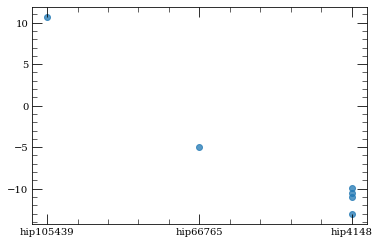

In [17]:
plt.scatter(tab['name'], tab['Vrad'], alpha = 0.75)

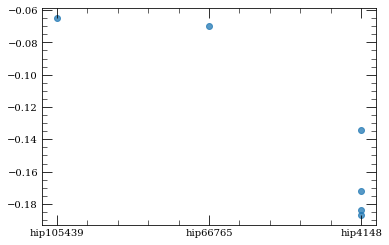

In [18]:
plt.scatter(tab['name'], tab['FeH'], alpha = 0.75)

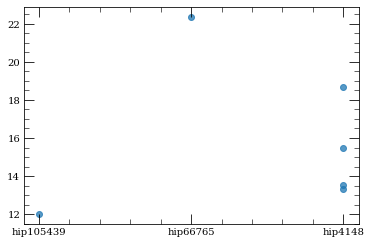

In [19]:
plt.scatter(tab['name'], tab['Vrot'], alpha = 0.75)

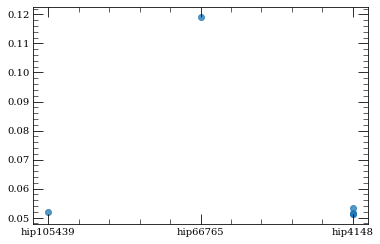

In [20]:
plt.scatter(tab['name'], tab['Av'], alpha = 0.75)